# Image pyramids etc


In [1]:
import numpy as np
import matplotlib.pyplot as plt

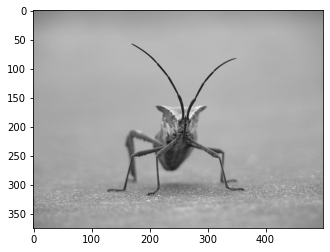

In [2]:
img = cv2.imread('stinkbug.png')
Igray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(Igray, cmap='gray')
src = Igray.copy()

(375, 500)
(188, 250)
(94, 125)
(47, 63)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f9a1eae4490>)

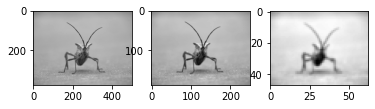

In [3]:
src = Igray.copy()
GaussPyr = [src]
print(src.shape)
for i in range(3):
    src= cv2.pyrDown(src)
    GaussPyr.append(src)
    print(src.shape)
    

plt.subplot(131),plt.imshow(GaussPyr[0], cmap = 'gray')
plt.subplot(132),plt.imshow(GaussPyr[1], cmap = 'gray')
plt.subplot(133),plt.imshow(GaussPyr[3], cmap = 'gray')

(125, 94)
(94, 125)
(250, 188)
(188, 250)
(500, 375)
(375, 500)


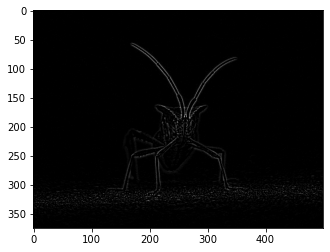

In [4]:
laplacian_top = GaussPyr[-1]
LaplacePyr = [laplacian_top]
for i in range(3,0,-1):
    size = (GaussPyr[i-1].shape[1],GaussPyr[i-1].shape[0])
    print(size)
    tmp=cv2.pyrUp(GaussPyr[i], dstsize=size)
    print(tmp.shape)
    laplacian = cv2.subtract(GaussPyr[i-1],tmp)
    LaplacePyr.append(laplacian)
    

#plt.subplot(131),plt.imshow(LaplacePyr[0], cmap = 'gray')
#plt.subplot(132),plt.imshow(LaplacePyr[1], cmap = 'gray')
#plt.subplot(133),plt.imshow(LaplacePyr[2], cmap = 'gray')
plt.imshow(LaplacePyr[3], cmap = 'gray')

# Application - blending two images


(<AxesSubplot:title={'center':'Image blending'}>,
 Text(0.5, 1.0, 'Image blending'))

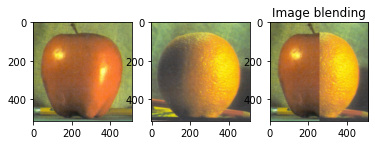

In [6]:
import cv2 as cv
import numpy as np,sys
Iapple = cv.imread('apple.jpg')
Iorange = cv.imread('orange.jpg')
Iapple = cv2.cvtColor(Iapple, cv2.COLOR_BGR2RGB)
Iorange = cv2.cvtColor(Iorange, cv2.COLOR_BGR2RGB)


    
# image with direct connecting each half
rows,cols,dpt = Iapple.shape
ic=int(cols/2)
ImBlend = np.hstack((Iapple[:,:ic],Iorange[:,ic:]))


plt.subplot(131),plt.imshow(Iapple, cmap = 'gray')
plt.subplot(132),plt.imshow(Iorange, cmap = 'gray')
plt.subplot(133), plt.imshow(ImBlend), plt.title("Image blending")
    



# Lets try to blend the laplacian at different scales instead.


True

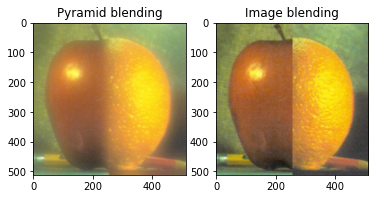

In [7]:
# generate Gaussian pyramid for Iapple
G = Iapple.copy()
gpApple = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpApple.append(G)
    
# generate Gaussian pyramid for Iorange
G = Iorange.copy()
gpOrange = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpOrange.append(G)
    
# generate Laplacian Pyramid for Iapple
lpApple = [gpApple[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpApple[i])
    L = cv.subtract(gpApple[i-1],GE)
    lpApple.append(L)
    
# generate Laplacian Pyramid for Iorange
lpOrange = [gpOrange[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpOrange[i])
    L = cv.subtract(gpOrange[i-1],GE)
    lpOrange.append(L)
    

plt.imshow(gpOrange[1])
#Now add left and right halves of images in each level = []
LPmix = []
for la,lo in zip(lpApple,lpOrange):
    rows,cols,dpt = la.shape
    #print(la.shape)
    ic=int(cols/2)
    mix = np.hstack((la[:,0:ic], lo[:,ic:]))
    LPmix.append(mix)


# now reconstruct
PyrBlend = LPmix[0]
for i in range(1,6):
    PyrBlend = cv.pyrUp(PyrBlend)
    PyrBlend = cv.add(PyrBlend, LPmix[i])

plt.subplot(121), plt.imshow(PyrBlend), plt.title("Pyramid blending")
plt.subplot(122), plt.imshow(ImBlend), plt.title("Image blending")
I_PB = cv2.cvtColor(PyrBlend, cv2.COLOR_BGR2RGB)
I_DB = cv2.cvtColor(ImBlend, cv2.COLOR_BGR2RGB)

cv2.imwrite('Pyramid_blending2.jpg', I_PB)
cv2.imwrite('Direct_blending.jpg',I_DB)